# Optimización de código 

## Formas de optimizar el código en las `funciones` y los ciclos `for`

Para ilustrar el método usemos el siguiente ejemplo: Muestre en una lista cada una de las letras de la siguiente variable `oldlist = 'Este es el texto de ejemplo'` en letra mayúscula.

In [7]:
# Posible solución
oldlist = 'Este es el texto de ejemplo'
newlist = []
for word in oldlist:
    newlist.append(word.upper())
print(newlist)

['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']


- **Evitando puntos ... **
 
Suponemos que no puedes usar la función `map` o una lista de compresión. Puede estar atascado con el bucle for. El ejemplo de bucle for tiene otra ineficiencia. Tanto `newlist.append ` como `word.upper` son referencias de funciones que se reevalúan cada vez a través del ciclo. El bucle original puede ser reemplazado por:

In [8]:
oldlist = 'Este es el texto de ejemplo'
upper = str.upper
newlist = []
append = newlist.append
for word in oldlist:
    append(upper(word))
print(newlist)

['E', 'S', 'T', 'E', ' ', 'E', 'S', ' ', 'E', 'L', ' ', 'T', 'E', 'X', 'T', 'O', ' ', 'D', 'E', ' ', 'E', 'J', 'E', 'M', 'P', 'L', 'O']


- **Variables locales.**

La aceleración final disponible para nosotros para la versión que no es un `map` del bucle for, es usar variables locales siempre que sea posible. Si el ciclo anterior se convierte como una función, las variables append y upper se convierten en locales. Python accede a las variables locales de forma mucho más eficiente que las variables globales.

In [9]:
# Generación de función para utilizar variables locales
def func(oldlist):
    upper = str.upper
    newlist = []
    append = newlist.append
    for word in oldlist:
        append(upper(word))
    return newlist

In [10]:
# Librerías a usar en todo el programa
import numpy as np
import time,math 
import matplotlib.pyplot as plt

## Funciones lambda

Las funciones `lambda` o funciones anónimas, son un tipo de función que introduce python en su estructura, en donde se usa frecuentemente en dos situaciones principales: (a) si la función es bastante simple, y (b) si solo se usará una vez. Las funciones de Lambda se pueden usar donde sea que se requieran objetos de función

Python utiliza dos formas distintas de crear funciones: usando la sintáxis `def` y `lambda`. A continuación se muestran dos ejemplos de los usos de estas dos sintaxis:

#### Ejemplo raiz cuadrada

In [11]:
###### Usando la sintáxis def
def square_root1(x): return math.sqrt(x)

###### Usando la sintaxis lambda
square_root2 = lambda x: math.sqrt(x)

print('Usando la sintáxis def obtenemos:',square_root1(4))
print('Usando la sintáxis lambda obtenemos:',square_root2(4))

Usando la sintáxis def obtenemos: 2.0
Usando la sintáxis lambda obtenemos: 2.0


Normalmente, las funciones se crean para uno de dos propósitos: (a) reducir la duplicación de código, o (b) modularizar el código.

Si tienes una función que es usada una única vez, no necesitas darle un nombre a la función. Puede ser 'anónima' y además puede definirla justo en el lugar donde desea usarlo. Ahí es donde `lambda` es útil.

## ¿Porqué el uso de la función lambda es en ocasiones confuso?

**Primero:** Lambda es confuso porque: el requisito de que una lambda pueda tomar solo una expresión plantea la pregunta: ¿Qué es una expresión?. En Python, ¿cuál es la diferencia entre una expresión y una declaración (statement)?. Una buena respuesta es que una expresión devuelve (o evalúa) un valor, mientras que una declaración no.

Una pregunta que resulta entonces, es ¿qué tipo de cosas puedo, y no puedo, poner en una función lambda? Y la respuesta a esa pregunta es básicamente
   - Si no devuelve un valor, no es una expresión y no se puede poner en una lambda.
   - Si puede imaginarlo en una declaración de asignación, en el lado derecho del signo igual, es una expresión y puede colocarse en una lambda.

Usando estas reglas podríamos entonces llegar a las siguientes conclusiones:

*1*. Los enunciados de asignación no se pueden usar en lambda. En Python, las declaraciones de asignación no devuelven nada, ni siquiera Ninguno (nulo).
     
**Ejemplo**

In [12]:
s = lambda a: h=a
s(1)

SyntaxError: can't assign to lambda (<ipython-input-12-63a44d065179>, line 1)

*2*. Cosas simples como operaciones matemáticas, operaciones de cadenas, comprensión de listas, etc. están bien en una lambda.

*3*. Las llamadas a funciones son expresiones. Está bien colocar una llamada de función en un lambda y pasar argumentos a esa función. Al hacerlo, envuelve la llamada a la función (argumentos y todo) dentro de una nueva función anónima. Incluso la función `print` puede ser usada dentro de una función lambda.

**Ejemplo**

In [ ]:
def suma(a,b):
    return a+b

# función anónima
suma_potencia = lambda n,a,b: \
             print('la suma de %d y %d a la potencia %s es: %.1f' % (a,b,n, suma(a,b)**n))
suma_potencia(2,3,4)

*4*. Las expresiones condicionales, son expresiones (y no simplemente una sintaxis diferente para una instrucción if / else). Devuelven un valor y se pueden usar en una lambda
   
**Ejemplo**

In [ ]:
f1 = lambda: a if some_condition() else b
f2 = lambda x: 'big' if x > 100 else 'small'

**Segundo:** Lambda es confuso porque: lambda generalmente se describe como una herramienta para crear funciones, pero una especificación lambda no contiene una declaración de *return*.

La declaración de *return* está, en cierto sentido, implícita en una lambda. Como una especificación lambda debe contener solo una expresión, y esa expresión debe devolver un valor, una función anónima creada por lambda devuelve implícitamente el valor devuelto por la expresión. Esto tiene perfecto sentido. Aún así, la falta de una declaración de *return* explícita es, creo, parte de lo que hace que sea difícil asimilar lambda, o al menos, difícil asimilarlo rápidamente.

**Ejemplo de combinación de los dos tipos de funciones**

In [ ]:
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(42)
i1 = 0; i2 = 5
print('Incrementar en %d unidades'% i1, f(i1),'\nIncrementar en %d unidades' %i2, f(i2))

## - Función map()

Puedes pensar en la función `map()` como un `for` movido al código C. La única restricción es que el 'cuerpo de bucle' de la función `map` debe ser una llamada a función. Además del beneficio sintáctico de las listas de compresión, a menudo son tan rápidas o más rápidas que el uso equivalente del `map`. La sintaxis de la función es:

> `r = map(función, secuencia)`

Con Python 3, map () devuelve un iterador, si queremos obtener los valores numéricos debemos usar compresión de listas o el comando `list`.

**Ejemplos**

In [ ]:
Celsius = [39.2, 36.5, 37.3, 37.8]

Fahrenheit = list(map(lambda x: (float(9)/5)*x + 32, Celsius))
print(Fahrenheit)

C = map(lambda x: (float(5)/9)*(x-32), Fahrenheit)
print(list(C))

In [ ]:
oldlist = 'Este es el texto de ejemplo'

tiempo = []
########### Agregando datos a una lista
newlist1 = []
for word in oldlist:
    newlist1.append(word.upper())
    
############  Usando la función map
newlist2 = map(str.upper, oldlist)

############ Usando compresión de listas
newlist3 = [s.upper() for s in oldlist]

print('Con el método de agregar datos a la lista:',newlist1)
print('Usando la funcion map:',[i for i in newlist2])
print('Usando compresión de listas:', newlist3)


- Mientras todavía utilizamos `lamda` como una función, podemos tener una lista de funciones como una secuencia:

In [ ]:
def square(x):
        return (x**2)
def cube(x):
        return (x**3)

funcs = [square, cube]
for r in range(5):
    value = list(map(lambda x: x(r), funcs))
    print(value)

-  Además de eso, la función `map` se puede usar de manera más avanzada. Por ejemplo, dados múltiples argumentos de secuencia, envía elementos tomados de secuencias en paralelo como argumentos distintos a la función:

**Ejemplo**

In [ ]:
p1 = pow(2,10)
p2 = pow(3,5)
p3 = pow(3,11)
p4 = pow(4,12)
print('Estos son los resultados de las potencias:',p1,p2,p3,p4)

pot_map = list(map(pow, [2, 3, 3, 4], [10, 5, 11, 12]))
print('Estos son los resultados usando map:',pot_map)

## - Función filter()

La función `filter(función, lista)` ofrece una forma elegante de filtrar todos los elementos de una lista, para lo cual la función de función devuelve `True`. 
La función `filter(f, l)` necesita una función f como primer argumento. `f` devuelve un valor booleano, es decir, verdadero o falso. Esta función se aplicará a cada elemento de la lista `l`. Solo si `f` devuelve True, el elemento de la lista se incluirá en la lista de resultados.

**Ejemplo**

In [ ]:
fib = [0,1,1,2,3,5,8,13,21,34,55]
# Selecciona los números impares de la lista
result = list(filter(lambda x: x % 2, fib))
print('Numeros impares de la lista:',result)

# Selecciona los números pares de la lista
result = list(filter(lambda x: x % 2 == 0, fib))
print('Numeros pares de la lista:',result)


## - Función reduce()
La función
> reduce(func, secuencia)

continuamente aplica la función func() a la secuencia. Devuelve un solo valor.

Si `secuencia = [s1, s2, s3, ..., sn]`, la llamada de la función `reduce(func, secuencia)` funciona así: 
 
   - Al principio, los primeros dos elementos de secuencia se aplicarán a `func`, es decir, `func(s1, s2)`. La lista en la que se trabaja con reduce() se ve así: `[func (s1, s2), s3, ..., sn ] `
   - En el siguiente paso, se aplicará func sobre el resultado anterior y el tercer elemento de la lista, es decir, `func (func (s1, s2), s3) `
   - La lista se ve así ahora: [func (func (s1, s2), s3), ..., sn] 
   - Continuar así hasta que quede un solo elemento y devolver este elemento como resultado de reduce()

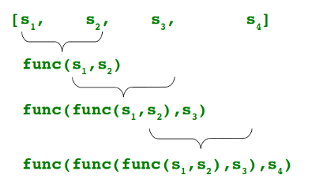

**Ejemplos**

In [ ]:
from functools import reduce

# Realiza la suma de los elementos de una lista
print('La suma de la lista es:',reduce(lambda x,y: x+y, [47,11,42,13]))

# Determinar el máximo de una lista de valores numéricos 
f = lambda a,b: a if (a > b) else b
print('El máximo valor de la lista es:',reduce(f, [47,11,42,102,13]))

# Calcular el producto de una lista 
print('El producto de la lista es:',reduce(lambda x, y: x*y, range(1,49)))

> Página donde pueden profundizar un poco más acerca de las funciones `map, filter, and reduce` [Enlace](http://www.bogotobogo.com/python/python_fncs_map_filter_reduce.php)

## Comparación tiempo de simulación para grandes cantidades de datos 

Lo que se pretende en este apartado es mostrar la forma mas eficiente de realizar cálculos cuando se tiene gran cantidad de datos. Se comparán las técnicas tales como: ciclos for, paquete numpy, compresión de listas y la función map. Para efectos de simulación se desea comparar los tiempos necesarios para calular el valor del $log_{10}$ para un vector de tamaño $1\times 10^7$, que contiene valores aleatorios flotantes obtenidos mediante un distribución normal, para las cuatro técnicas mencionadas anteriormente.

In [ ]:
# Número de muestras
N = 10**7
# Lista con valores aleatorios
l1 = np.random.normal(50,5,N)
speed = []

############ Usando ciclo for
t1 = time.time()
l2 = []
for item in l1:
    l2.append(math.log10(item))
t2 = time.time()
print("Con ciclos for y agregando los resutados toma {} segundos".format(t2-t1))
speed.append(t2-t1)

In [ ]:
########### Usando map function 
t1 = time.time()
m1 = map(lambda x:math.log10(x),l1)
m1 = [i for i in m1]
t2 = time.time()
print("Usando la función map para el método log10 toma {} segundos".format(t2-t1))
speed.append(t2-t1)

In [ ]:
########### Usando comprensión de listas
t1=time.time()
cl=[math.log10(i) for i in l1]
t2 = time.time()
print("Usando compresión de listas toma {} segundos".format(t2-t1))
speed.append(t2-t1)

In [ ]:
########### Usando numpy
t1=time.time()
a2=np.log10(l1)
t2 = time.time()
print("Usando la librería Numpy y el método log10 toma {} segundos".format(t2-t1))
speed.append(t2-t1)

In [ ]:
ind = np.arange(1, 5)
plt.bar(ind,speed)
plt.xticks(ind,['Ciclo for', 'Función map', 'Compresión de\n listas', 'Numpy'])
plt.ylabel('Tiempo gastado ')
plt.show()

## Vectorizar distribución de poisson
$$\textbf{Función de densidad de probabilidad}\\p(k)=\frac{\lambda^k e^{-\lambda}}{k!},\quad k\in \mathbb{N}$$

In [ ]:
import scipy.special as sps 
from itertools import cycle  # Librería para hacer ciclos

cycol = cycle('bgrcmk')

p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k)

# Como se haría de forma ineficiente
l= 1
for i in range(3):
    P = []
    c = next(cycol)
    for k in range(60):
        P.append(p(k,l))
    plt.subplot(211)
    plt.plot(P,'o',c=c,label='$\lambda$=%s' % l, markersize=2)
    plt.title('Densidad de distrución de probabilidad')
    plt.legend()
    
    plt.subplot(212)
    plt.plot(np.cumsum(P),'o',c=c,label='$\lambda$=%s' % l, markersize=3)
    plt.title('Distrución de probabilidad acumulada')
    plt.legend()
    plt.hlines(np.cumsum(P),range(len(P)),range(1,len(P)+1),color=c)
    l +=20

plt.subplots_adjust(hspace=.5)
plt.show()

In [ ]:
# Forma vectorizada
cycol = cycle('bgrcmk')
N = 70
k = np.arange(0,N)
l = np.arange(1,42,20)
p = lambda k,l:(l**k*np.exp(-l))/sps.gamma(k)
ones = np.ones(len(k))
for lamb2 in l:
    L = lamb2*ones
    P = list(map(p,k,L))
    c = next(cycol)
    plt.subplot(211)
    plt.plot(P,'o',c=c,label='$\lambda$=%d' % lamb2, markersize=2)
    plt.legend()

    plt.subplot(212)
    plt.plot(np.cumsum(P),'o',c=c,label='$\lambda$=%s' % lamb2, markersize=3)

plt.title('Densidad de distrución de probabilidad')
plt.legend()
plt.subplots_adjust(hspace=.5)

plt.show()


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Xiuhcoatl.
</footer>